In [1]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

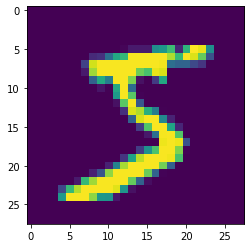

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]);

In [7]:
x_train = x_train.reshape(60000,28,28,1).astype('float32')
x_test = x_test.reshape(10000,28,28,1).astype('float32')

In [8]:
num_of_classes = 10
y_train = np_utils.to_categorical(y_train,num_of_classes)
y_test = np_utils.to_categorical(y_test,num_of_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(num_of_classes,activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5, batch_size =32)

Epoch 1/5
1875/1875 [==============================] - 122s 64ms/step - loss: 0.2527 - accuracy: 0.9506 - val_loss: 0.0976 - val_accuracy: 0.9721
Epoch 2/5
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0711 - accuracy: 0.9793 - val_loss: 0.0920 - val_accuracy: 0.9738
Epoch 3/5
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0496 - accuracy: 0.9850 - val_loss: 0.1033 - val_accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0369 - accuracy: 0.9878 - val_loss: 0.1036 - val_accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.0981 - val_accuracy: 0.9792


In [13]:
metrics = model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test accuracy):")
print(metrics)

Metrics(Test loss & Test accuracy):
[0.09808533638715744, 0.979200005531311]


In [14]:
prediction  = model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 131ms/step
[[6.61719333e-15 7.59858854e-21 1.89469482e-10 3.75756004e-09
  2.41648760e-18 4.06243255e-17 4.05067731e-22 1.00000000e+00
  1.89049449e-12 1.22477647e-12]
 [4.65820871e-12 1.69033676e-10 1.00000000e+00 1.80292586e-11
  1.12745894e-19 6.18165831e-15 1.65040326e-09 2.57389575e-20
  1.05255707e-10 6.66688833e-20]
 [3.14787779e-10 9.99888659e-01 1.05370847e-04 7.73627039e-13
  1.17202103e-06 5.19466994e-07 9.47884544e-08 1.21133814e-08
  4.21904861e-06 2.38819808e-09]
 [1.00000000e+00 1.58954375e-16 1.05291284e-13 4.81392647e-17
  2.42599532e-15 1.06281916e-14 1.15643628e-09 3.45879225e-18
  6.47515988e-15 5.08273479e-10]]


In [15]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
metrics = model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test accuracy):")
print(metrics)

Metrics(Test loss & Test accuracy):
[0.09808533638715744, 0.979200005531311]


In [17]:
prediction  = model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 23ms/step
[[6.61719333e-15 7.59858854e-21 1.89469482e-10 3.75756004e-09
  2.41648760e-18 4.06243255e-17 4.05067731e-22 1.00000000e+00
  1.89049449e-12 1.22477647e-12]
 [4.65820871e-12 1.69033676e-10 1.00000000e+00 1.80292586e-11
  1.12745894e-19 6.18165831e-15 1.65040326e-09 2.57389575e-20
  1.05255707e-10 6.66688833e-20]
 [3.14787779e-10 9.99888659e-01 1.05370847e-04 7.73627039e-13
  1.17202103e-06 5.19466994e-07 9.47884544e-08 1.21133814e-08
  4.21904861e-06 2.38819808e-09]
 [1.00000000e+00 1.58954375e-16 1.05291284e-13 4.81392647e-17
  2.42599532e-15 1.06281916e-14 1.15643628e-09 3.45879225e-18
  6.47515988e-15 5.08273479e-10]]


In [18]:
model.save('models/mnistCNN.h5')

In [21]:
from tensorflow.keras.models import load_model
model = load_model('C:\\Users\\nandh\\models\\mnistCNN.h5')
from PIL import Image
import numpy as np
for index in range(4):
    img = Image.open('data\\'+str(index)+'.png',"r").convert("L")
    img = img.resize((28,28))
    im2arr = np.array(img)
    im2arr = im2arr.reshape(1,28,28,1)
    y_pred = model.predict(im2arr)
    print(y_pred)

FileNotFoundError: [Errno 2] No such file or directory: 'data\\0.png'